Check  the data

In [325]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import random
from sklearn.preprocessing import MinMaxScaler



df_usdt = pd.read_csv('USDT_data_new.csv', header=0)



In [326]:
df_usdt.head()

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
0,2018-12-30T00:00:00.000Z,"""2018-12-30T23:59:59.999Z""","""2018-12-30T00:17:06.000Z""","""2018-12-30T19:47:04.000Z""",1.030514,1.035273,1.016393,1.019086,3.762583e+09,1.893630e+09,"""2018-12-30T23:59:59.999Z"
1,2018-12-29T00:00:00.000Z,"""2018-12-29T23:59:59.999Z""","""2018-12-29T23:48:00.000Z""","""2018-12-29T21:19:02.000Z""",1.023953,1.048695,1.015617,1.031473,4.372940e+09,1.916646e+09,"""2018-12-29T23:59:59.999Z"
2,2018-12-28T00:00:00.000Z,"""2018-12-28T23:59:59.999Z""","""2018-12-28T22:34:02.000Z""","""2018-12-28T15:39:03.000Z""",1.022574,1.032146,0.997092,1.023160,4.639998e+09,1.901201e+09,"""2018-12-28T23:59:59.999Z"
3,2018-12-27T00:00:00.000Z,"""2018-12-27T23:59:59.999Z""","""2018-12-27T19:09:02.000Z""","""2018-12-27T11:58:01.000Z""",1.023169,1.043492,1.015800,1.024174,3.977541e+09,1.901299e+09,"""2018-12-27T23:59:59.999Z"
4,2018-12-26T00:00:00.000Z,"""2018-12-26T23:59:59.999Z""","""2018-12-26T14:44:07.000Z""","""2018-12-26T19:08:02.000Z""",1.021943,1.032330,1.011707,1.019550,4.461185e+09,1.892714e+09,"""2018-12-26T23:59:59.999Z"


Check the cleaned data for the presence of NaN values

In [327]:
df_usdt.isnull().sum()

timeOpen     0
timeClose    0
timeHigh     0
timeLow      0
open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64

Review the data format and summary statistics

In [328]:
df_usdt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2093 entries, 0 to 2092
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   2093 non-null   object 
 1   timeClose  2093 non-null   object 
 2   timeHigh   2093 non-null   object 
 3   timeLow    2093 non-null   object 
 4   open       2093 non-null   float64
 5   high       2093 non-null   float64
 6   low        2093 non-null   float64
 7   close      2093 non-null   float64
 8   volume     2093 non-null   float64
 9   marketCap  2093 non-null   float64
 10  timestamp  2093 non-null   object 
dtypes: float64(6), object(5)
memory usage: 180.0+ KB


Remove unnecessary columns and convert timestamps to datetime type

In [329]:
df_usdt.drop(["timeOpen","timeHigh","timeLow","timeClose"], axis=1, inplace=True)
df_usdt['timestamp'] = df_usdt['timestamp'].str.split('T').str[0]
df_usdt['timestamp'] = df_usdt['timestamp'].str.strip('"')
df_usdt["timestamp"] = pd.to_datetime(df_usdt["timestamp"])
df_usdt = df_usdt.rename(columns={'timestamp': 'date'})

df_usdt.sort_values(by='date', inplace=True)

df_usdt.head()

,open,high,low,close,volume,marketCap,date
363,1.01255,1.01536,1.001530,1.007280,1.685300e+09,1.378050e+09,2018-01-01
362,1.00574,1.00988,0.993250,1.004900,2.635860e+09,1.374793e+09,2018-01-02
361,1.00660,1.02328,1.002640,1.013440,2.471690e+09,1.386477e+09,2018-01-03
360,1.01320,1.01618,0.993822,1.002530,3.200130e+09,1.471804e+09,2018-01-04
359,1.00175,1.00501,0.985915,0.998634,3.096620e+09,1.466084e+09,2018-01-05


View the trend chart for volume

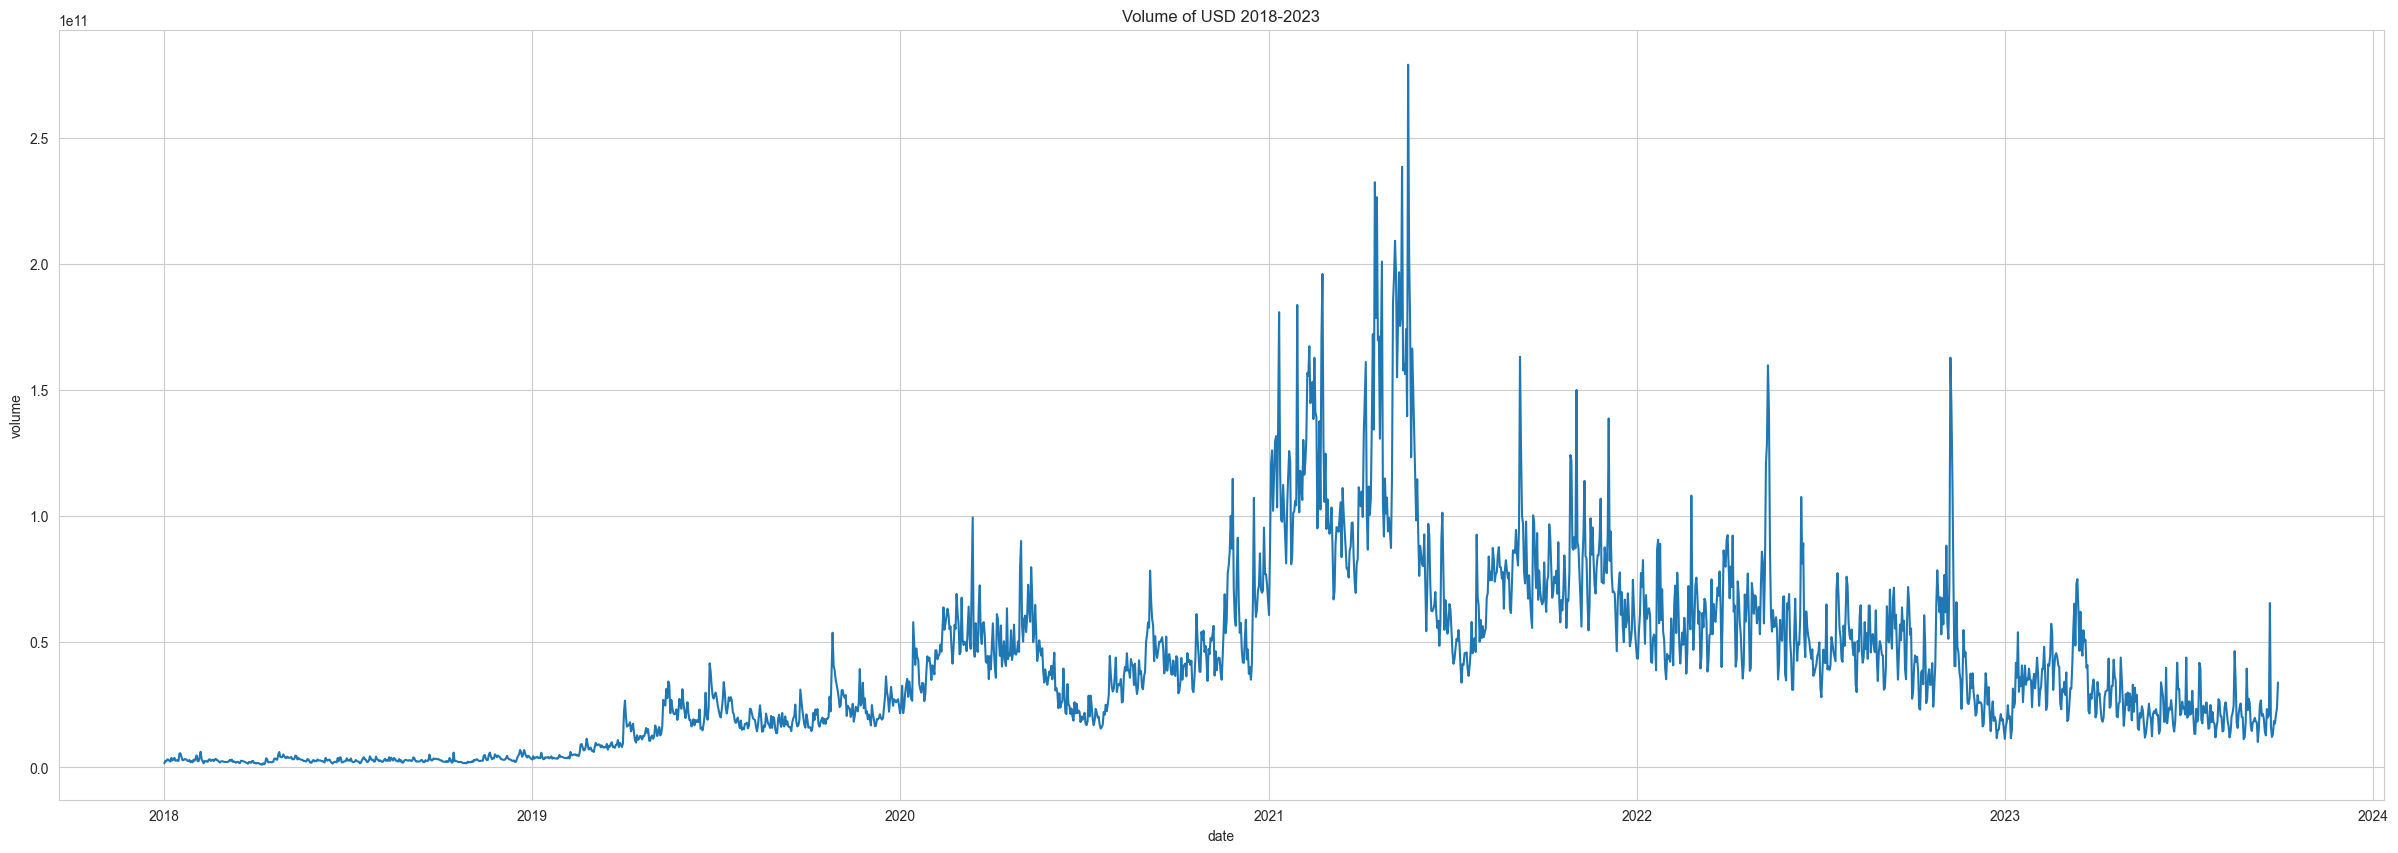

In [330]:
from matplotlib import pyplot as plt
import numpy as np # linear algebra
import seaborn as sns
import warnings
import matplotlib.dates as mpl_dates


tmp_df = df_usdt.groupby(["date"])["volume"].sum().reset_index()
plt.figure(figsize=(30,10))
sns.lineplot(data=tmp_df, x="date", y="volume")
plt.title('Volume of USD 2018-2023')
plt.show()

Add a new column to calculate daily returns

In [331]:

df_usdt['returns'] = ((df_usdt.close-df_usdt.open)/df_usdt.open)* 100
df_usdt.head()

,open,high,low,close,volume,marketCap,date,returns
363,1.01255,1.01536,1.001530,1.007280,1.685300e+09,1.378050e+09,2018-01-01,-0.520469
362,1.00574,1.00988,0.993250,1.004900,2.635860e+09,1.374793e+09,2018-01-02,-0.083527
361,1.00660,1.02328,1.002640,1.013440,2.471690e+09,1.386477e+09,2018-01-03,0.679514
360,1.01320,1.01618,0.993822,1.002530,3.200130e+09,1.471804e+09,2018-01-04,-1.053106
359,1.00175,1.00501,0.985915,0.998634,3.096620e+09,1.466084e+09,2018-01-05,-0.311057


Table of daily returns

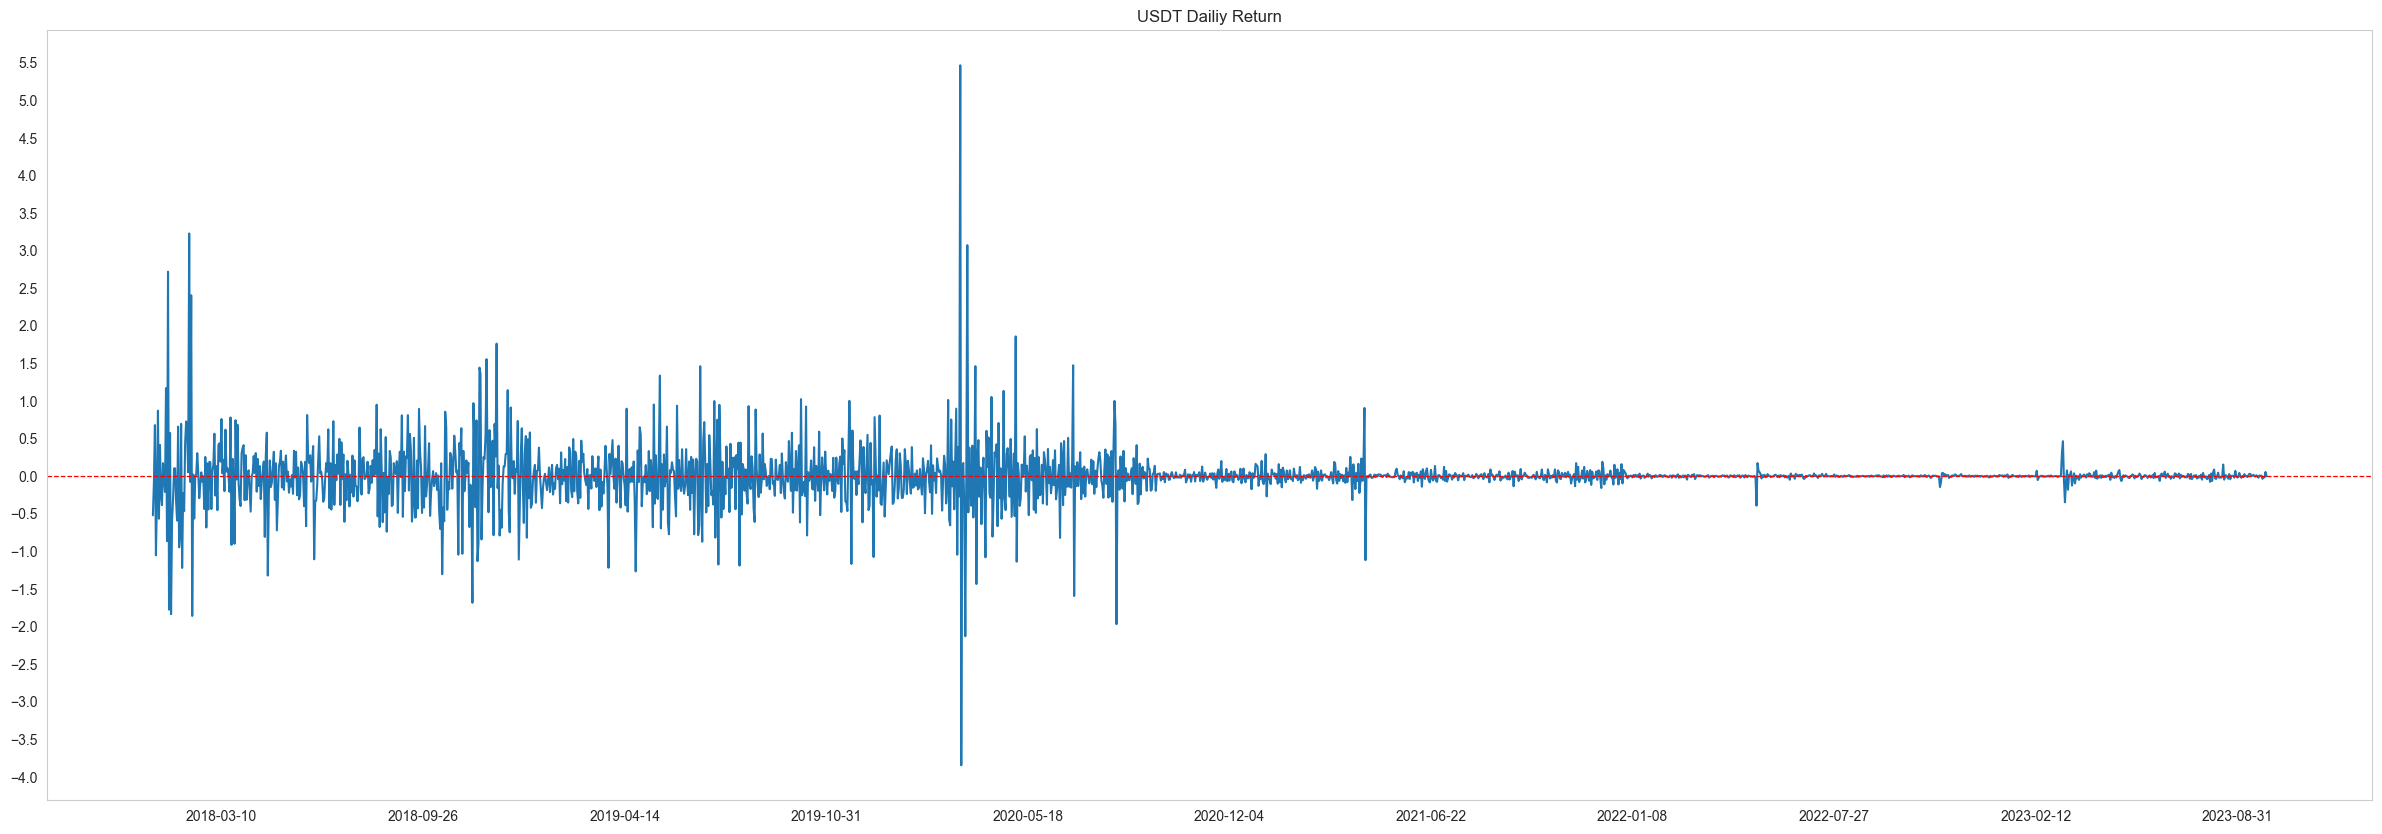

In [332]:
fig, ax = plt.subplots(figsize=(30, 10))
ax.plot(df_usdt['date'], df_usdt['returns'])
ax.xaxis.set_major_locator(plt.MaxNLocator(12))  
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5)) 
ax.axhline(y=0, color='red', linestyle='--', linewidth=0.9)
plt.title('USDT Dailiy Return')
plt.grid()
plt.show()


Table of monthly returns

In [333]:
grouped = df_usdt.groupby([df_usdt.date.dt.year, df_usdt.date.dt.month])
monthly_returns = grouped.last().close / grouped.first().open * 100 - 100
monthly_returns.index.names = ['Year', 'Month']
monthly_returns = monthly_returns.to_frame()
monthly_returns.reset_index(inplace=True)
monthly_returns.columns = ['Year', 'Month', 'Monthly_returns']
monthly_returns.head()

,Year,Month,Monthly_returns
0,2018,1,-2.199989
1,2018,2,0.740750
2,2018,3,0.092312
3,2018,4,0.323087
4,2018,5,-0.224641


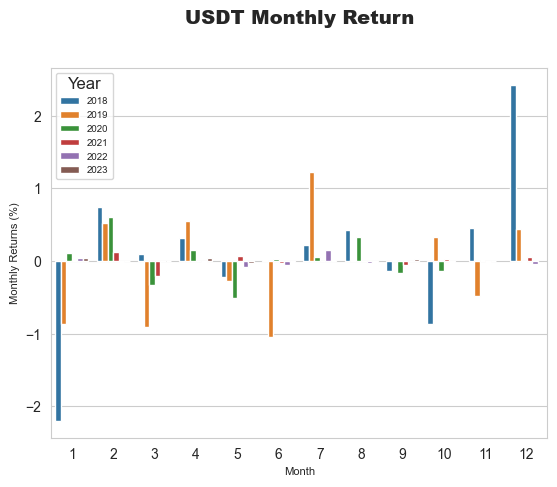

In [334]:
ax = sns.barplot(x='Month', y='Monthly_returns', hue='Year', data=monthly_returns,)
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)
ax.set_ylabel('Monthly Returns (%)', fontsize=8)
ax.set_xlabel('Month', fontsize=8)

ax.legend(title='Year', title_fontsize=12, fontsize=7, loc='upper left')
ax = plt.title('USDT Monthly Return', fontsize=14, loc='center', fontweight='heavy', pad=32)

Annual return rates

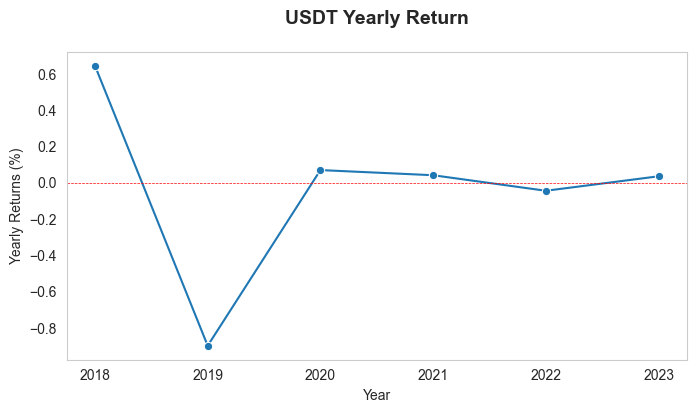

In [335]:
warnings.filterwarnings("ignore")  

yearly_returns = df_usdt.groupby(df_usdt.date.dt.year).last().close / df_usdt.groupby(df_usdt.date.dt.year).first().open * 100 - 100
sns.set_style("whitegrid")
plt.figure(figsize=(8, 4))
ax = sns.lineplot(x=yearly_returns.index, y=yearly_returns.values, palette="Blues", marker='o')
ax.set_title('USDT Yearly Return', fontsize=14, fontweight='bold', pad=20)
ax.axhline(y=0, color='red', linestyle='--', linewidth=0.5)
ax.set_xlabel('Year', fontsize=10)
ax.set_ylabel('Yearly Returns (%)', fontsize=10)
plt.xticks(rotation=0)
plt.grid()
plt.show()

Splitting the dataset into a training set and a test set with a 20% ratio

In [336]:
# import libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
from datetime import datetime as dt
import csv

# Create new data with only the "Close" column
close = df_usdt.filter(["returns"])
# Convert the dataframe to a np array
close_array = close.values
# See the train data len
# train_close_len = math.ceil(len(close_array) * 0.7)
train_close_len = math.ceil(len(close_array) * 0.9)
train_close_len

1884

In [337]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_array)
scaled_data

array([[0.35708946],
       [0.40401704],
       [0.48596785],
       ...,
       [0.41117378],
       [0.41902028],
       [0.41277268]])

In [338]:
# Create the training dataset
train_data = scaled_data[0 : train_close_len, :]
# Create X_train and y_train
X_train = []
y_train = []
for i in range(60, len(train_data)):
    X_train.append(train_data[i - 60 : i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(X_train)
        print(y_train)

[array([0.35708946, 0.40401704, 0.48596785, 0.29988415, 0.37958033,
       0.50650756, 0.3522117 , 0.45765239, 0.3854085 , 0.37163686,
       0.43161237, 0.41117351, 0.39041961, 0.5387422 , 0.32022565,
       0.7050721 , 0.22228321, 0.47475179, 0.21588678, 0.35027495,
       0.38022951, 0.42411409, 0.42421993, 0.37697549, 0.34959628,
       0.48371117, 0.31140418, 0.32937796, 0.48773288, 0.28193607,
       0.38849008, 0.36295736, 0.46147784, 0.49119843, 0.47447434,
       0.4185319 , 0.75971968, 0.40494946, 0.67140408, 0.21335235,
       0.41534314, 0.35240083, 0.41169889, 0.41620657, 0.44587354,
       0.41694077, 0.38156995, 0.40187116, 0.41843954, 0.40526509,
       0.41255798, 0.36609056, 0.44043927, 0.33971523, 0.4312256 ,
       0.36542302, 0.43340981, 0.4328077 , 0.36602507, 0.41914264])]
[0.4295684856583707]


Convert it to an np format

In [339]:
#  make X_train and y_train np array
X_train, y_train = np.array(X_train), np.array(y_train)

Reshape the data

In [340]:
# reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1824, 60, 1)

In [341]:
# create the testing dataset
test_data = scaled_data[train_close_len - 60 : , :]
# create X_test and y_test
X_test = []
y_test = df_usdt.iloc[train_close_len : , :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i - 60 : i, 0])

In [342]:
# convert the test data to a np array and reshape the test data
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Build the LSTM Model

In [343]:
# Build the LSTM Model
model = Sequential()

model.add(LSTM(units=512, return_sequences=True, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=256, activation='relu', return_sequences=False))
model.add(Dense(units=1))

In [344]:
# compile the LSTM model
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=['mae'])


In [345]:
# train the LSTM model
model.fit(X_train, y_train,
          epochs=3,
          batch_size=100, 
          verbose=1)

Epoch 1/3
19/19 [==============================] - 12s 565ms/step - loss: 0.0514 - mae: 0.1973
Epoch 2/3
19/19 [==============================] - 10s 536ms/step - loss: 0.0039 - mae: 0.0486
Epoch 3/3
19/19 [==============================] - 10s 551ms/step - loss: 0.0017 - mae: 0.0260


In [346]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 1s 58ms/step


Show the LSTM prediction results

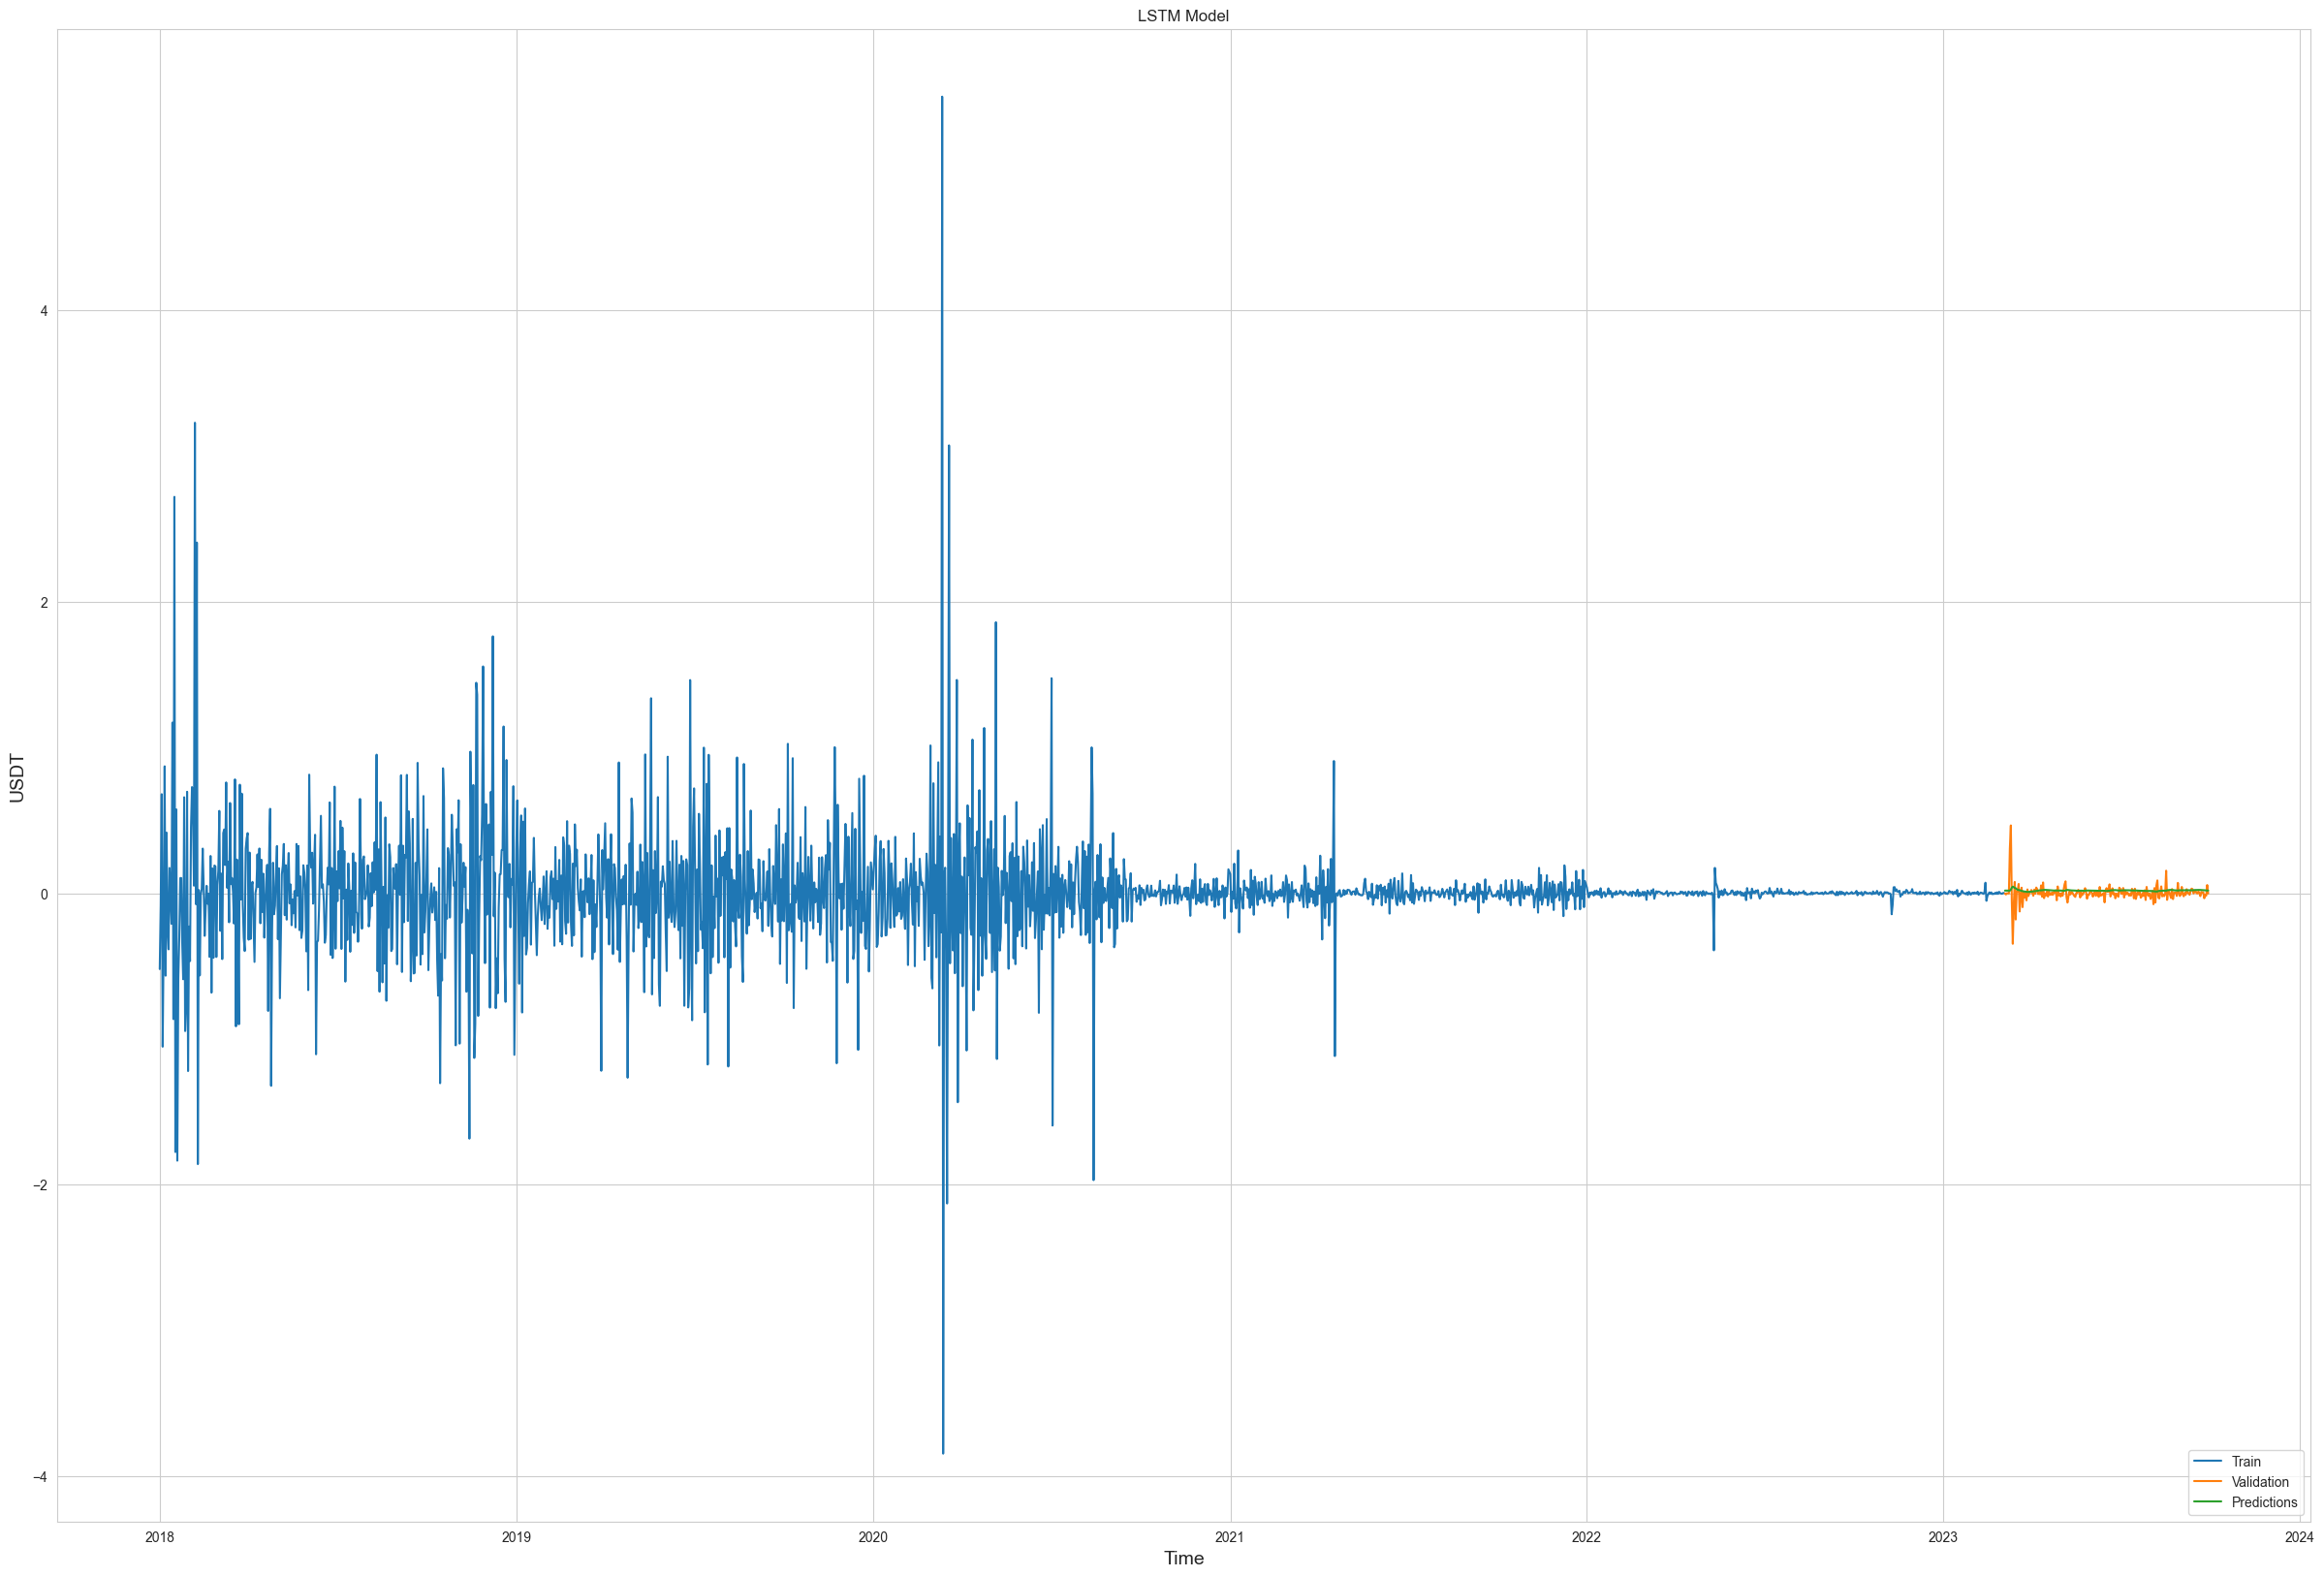

In [347]:
# plot the data
train = close[:train_close_len]
valid = close[train_close_len:]
valid["Predictions"] = predictions
#visualize the data
plt.figure(figsize=(30, 20))
plt.title("LSTM Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.plot(df_usdt["date"][:train_close_len], train["returns"])
plt.plot(df_usdt["date"][train_close_len:], valid[["returns", "Predictions"]])
plt.legend(["Train", "Validation", "Predictions"], loc="lower right")

plt.show()